In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
test_df = pd.read_csv('./drive/MyDrive/open/test.csv')
import warnings
warnings.filterwarnings(action='ignore')

Mounted at /content/drive


PRODUCT_ID : 제품의 고유 ID

Y_Class : 제품 품질 상태(Target)

0 : 적정 기준 미달 (부적합)

1 : 적합

2 : 적정 기준 초과 (부적합)

Y_Quality : 제품 품질 관련 정량적 수치

TIMESTAMP : 제품이 공정에 들어간 시각

LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)

PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)

X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수

In [ ]:
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37)

In [ ]:
train_df.shape

(598, 2881)

In [ ]:
test_df.shape

(310, 2879)

In [ ]:
code_list = list(train_df['PRODUCT_CODE'].unique())


In [ ]:
code_list

['A_31', 'T_31', 'O_31']

In [ ]:
for code in code_list:
  print(train_df[train_df['PRODUCT_CODE']==code]['LINE'].value_counts())#PRODUCT CODE별로 다른 라인

T050304    78
T010306    70
T010305    59
T050307    42
Name: LINE, dtype: int64
T100304    172
T100306    171
Name: LINE, dtype: int64
T100304    3
T100306    3
Name: LINE, dtype: int64


PRODUCE CODE 종류별로 지나가는 라인을 봅시다

In [ ]:
train_df[train_df['PRODUCT_CODE']=='O_31']

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df[train_df['PRODUCT_CODE']=='T_31']

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
22,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,TRAIN_025,1,0.529362,2022-06-19 9:11,T100304,T_31,2.0,97.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,TRAIN_026,1,0.531992,2022-06-19 9:20,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,TRAIN_029,1,0.532405,2022-06-19 23:31,T100304,T_31,2.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,TRAIN_589,1,0.529510,2022-09-06 18:00,T100306,T_31,1.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,TRAIN_590,1,0.529948,2022-09-07 1:01,T100306,T_31,1.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,TRAIN_591,1,0.529308,2022-09-07 1:09,T100306,T_31,1.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,TRAIN_592,1,0.528349,2022-09-08 14:22,T100304,T_31,2.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


라인 자체의 수행은 동일한 것으로 보임. Product 종류별로 딱히 지나가는 라인에서의 다른 점은 보이지 않음.

In [ ]:
T_prods = train_df[train_df['PRODUCT_CODE']=='T_31']


In [ ]:
T_nulls = T_prods.columns[T_prods.isnull().all()].tolist()

In [ ]:
len(T_nulls)

2198

In [ ]:
A_prods = train_df[train_df['PRODUCT_CODE']=='A_31']
A_nulls = A_prods.columns[A_prods.isnull().all()].tolist()
A_nulls

['X_1',
 'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'X_68',
 'X_69',
 'X_70',
 'X_71',
 'X_72',
 'X_73',
 'X_74',
 'X_75',
 'X_76',
 'X_77',
 'X_78',
 'X_79',
 'X_80',
 'X_81',
 'X_82',
 'X_83',
 'X_84',
 'X_85',
 'X_86',
 'X_87',
 'X_88',
 'X_89',
 'X_90',
 'X_91',
 'X_92',
 'X_93',
 'X_94',
 'X_95',
 'X_96',
 'X_97',
 'X_98',
 'X_99',
 'X_100',
 'X_101',
 'X_102',
 'X_103',
 'X_104',
 'X_105',
 'X_106',
 'X_107',
 'X_108',
 'X_109',
 'X_110',
 'X_111'

In [ ]:
len(A_nulls)

759

In [ ]:
O_prods = train_df[train_df['PRODUCT_CODE']=='O_31']
O_nulls = O_prods.columns[O_prods.isnull().all()].tolist()
O_nulls

['X_128',
 'X_129',
 'X_130',
 'X_131',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224',
 'X_225',
 'X_226',
 'X_227',


In [ ]:
len(O_nulls)

2208

In [ ]:
train_df[train_df['PRODUCT_CODE']=='A_31'].isnull()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True
584,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
585,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
594,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [ ]:
train_df.iloc[[594,595],:]

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.1,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df['Y_Class'].dtype

dtype('int64')

A의 distplot

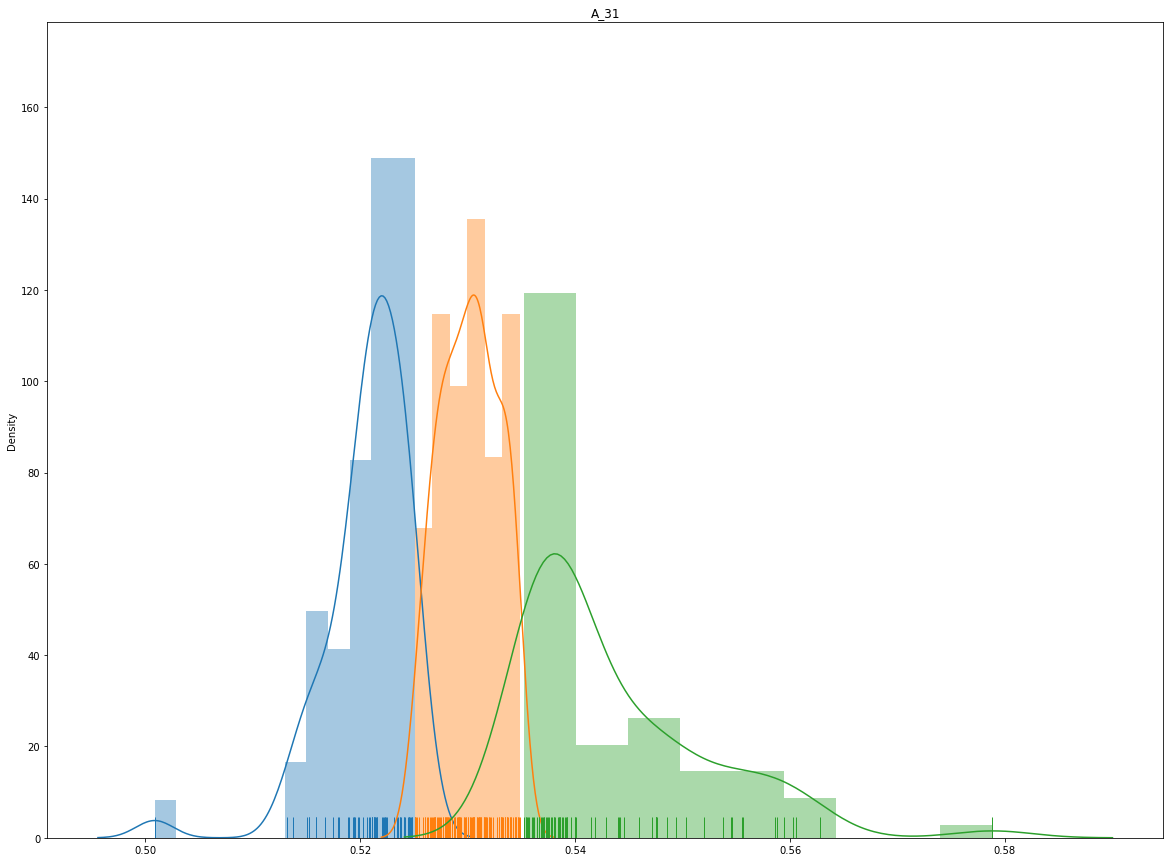

In [ ]:
# Sort the dataframe by target
rcParams['figure.figsize'] = 20, 15
target_A = train_df.loc[train_df['PRODUCT_CODE']=='A_31']
target_A0 = target_A.loc[target_A['Y_Class'] == 0]
target_A1 = target_A.loc[target_A['Y_Class'] == 1]
target_A2 = target_A.loc[target_A['Y_Class'] == 2]

sns.distplot(target_A0[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_A1[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_A2[['Y_Quality']], hist=True, rug=True)
plt.title('A_31')
plt.show()

In [ ]:
print(target_A0['Y_Quality'].max(), target_A1['Y_Quality'].min(),target_A1['Y_Quality'].max(),target_A2['Y_Quality'].min())

0.525046032 0.525085714 0.534842857 0.535279365


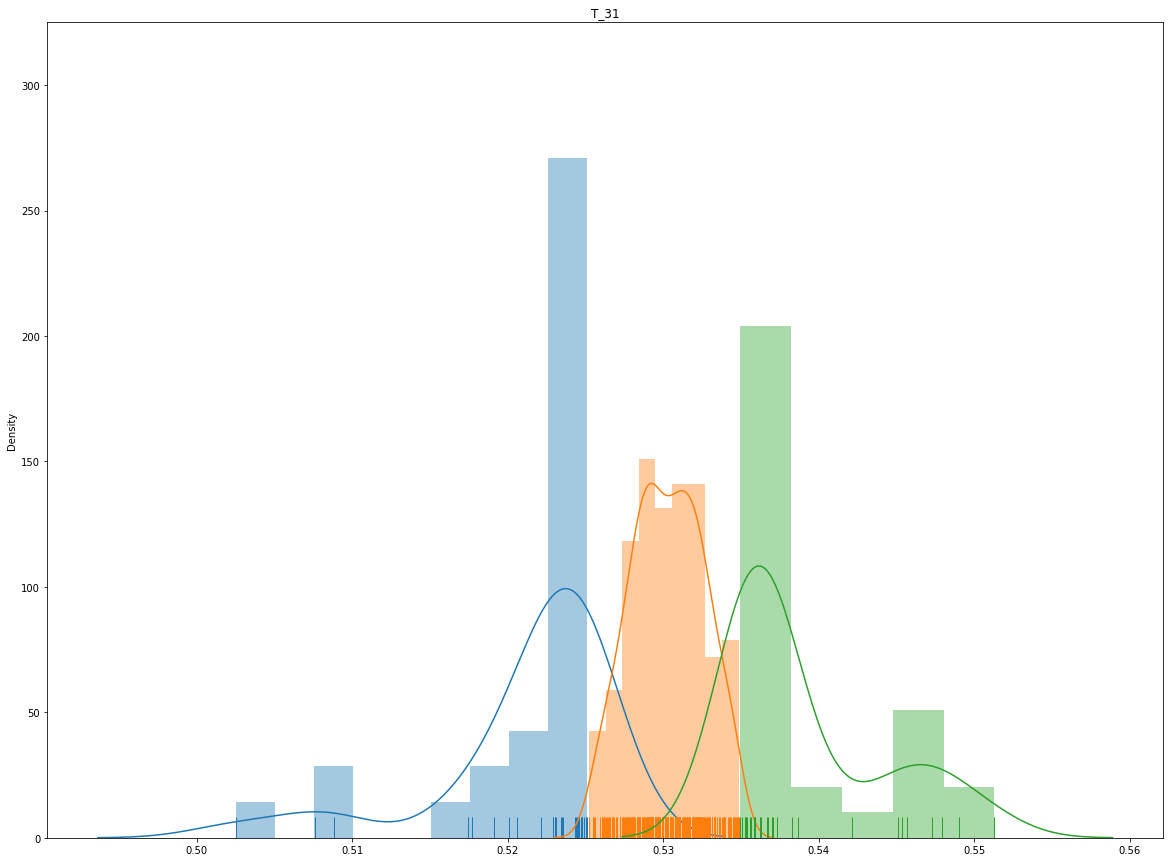

In [ ]:
# Sort the dataframe by target
rcParams['figure.figsize'] = 20, 15

target_T = train_df.loc[train_df['PRODUCT_CODE']=='T_31']
target_T0 = target_T.loc[target_T['Y_Class'] == 0]
target_T1 = target_T.loc[target_T['Y_Class'] == 1]
target_T2 = target_T.loc[target_T['Y_Class'] == 2]
plt.title('T_31')

sns.distplot(target_T0[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_T1[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_T2[['Y_Quality']], hist=True, rug=True)

plt.show()

In [ ]:
print(target_T0['Y_Quality'].max(), target_T1['Y_Quality'].min(),target_T1['Y_Quality'].max(),target_T2['Y_Quality'].min())

0.525066667 0.5252126979999999 0.5348365079999999 0.534950794


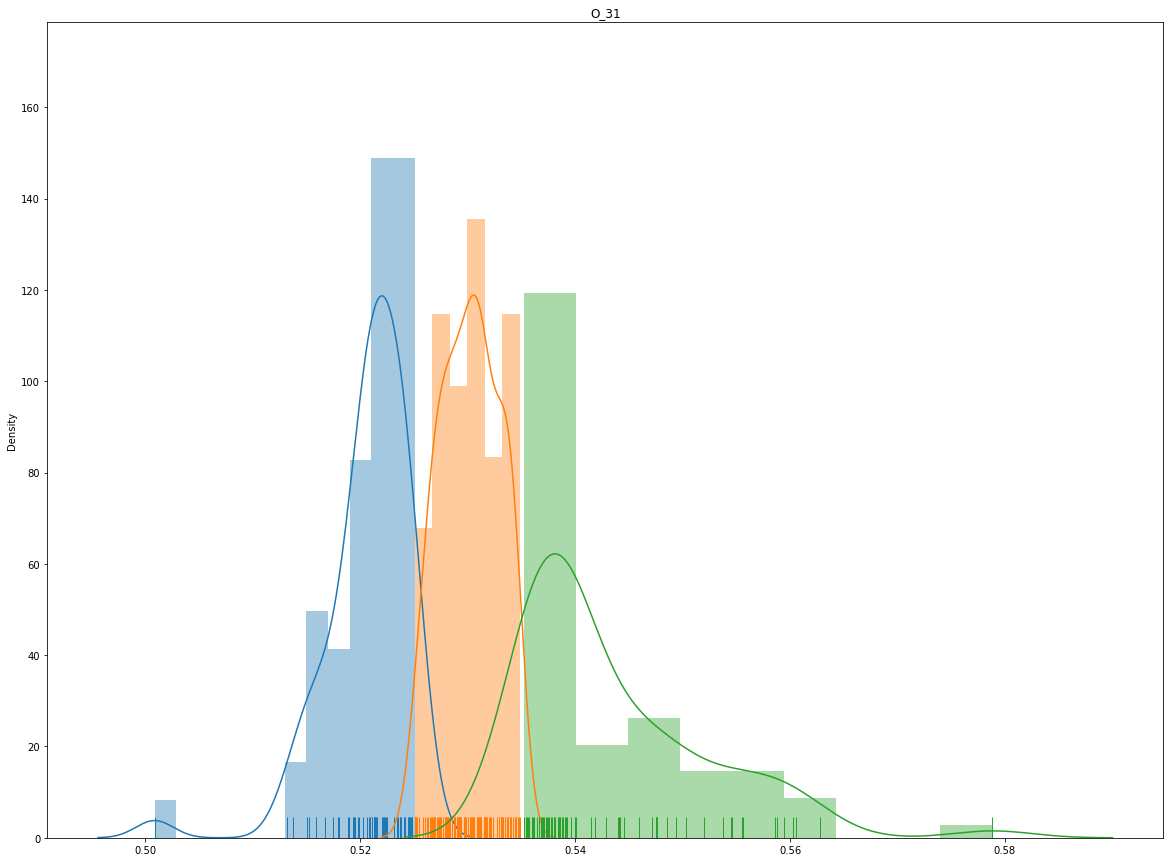

In [ ]:
# Sort the dataframe by target
rcParams['figure.figsize'] = 20, 15

target_O = train_df.loc[train_df['PRODUCT_CODE']=='A_31']
target_O0 = target_O.loc[target_A['Y_Class'] == 0]
target_O1 = target_O.loc[target_A['Y_Class'] == 1]
target_O2 = target_O.loc[target_A['Y_Class'] == 2]
plt.title('O_31')

sns.distplot(target_O0[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_O1[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_O2[['Y_Quality']], hist=True, rug=True)

plt.show()

In [ ]:
print(target_O0['Y_Quality'].max(), target_O1['Y_Quality'].min(),target_T1['Y_Quality'].max(),target_O2['Y_Quality'].min())

0.525046032 0.525085714 0.5348365079999999 0.535279365


In [ ]:
train_df[train_df['PRODUCT_CODE']=='O_31']

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


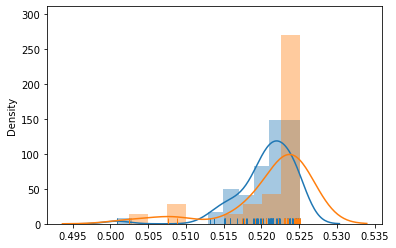

In [ ]:
sns.distplot(target_O0[['Y_Quality']], hist=True, rug=True)
sns.distplot(target_T0[['Y_Quality']], hist=True, rug=True)
plt.show()

In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Timestamps

In [ ]:
from datetime import datetime as dt
from pylab import rcParams
plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False


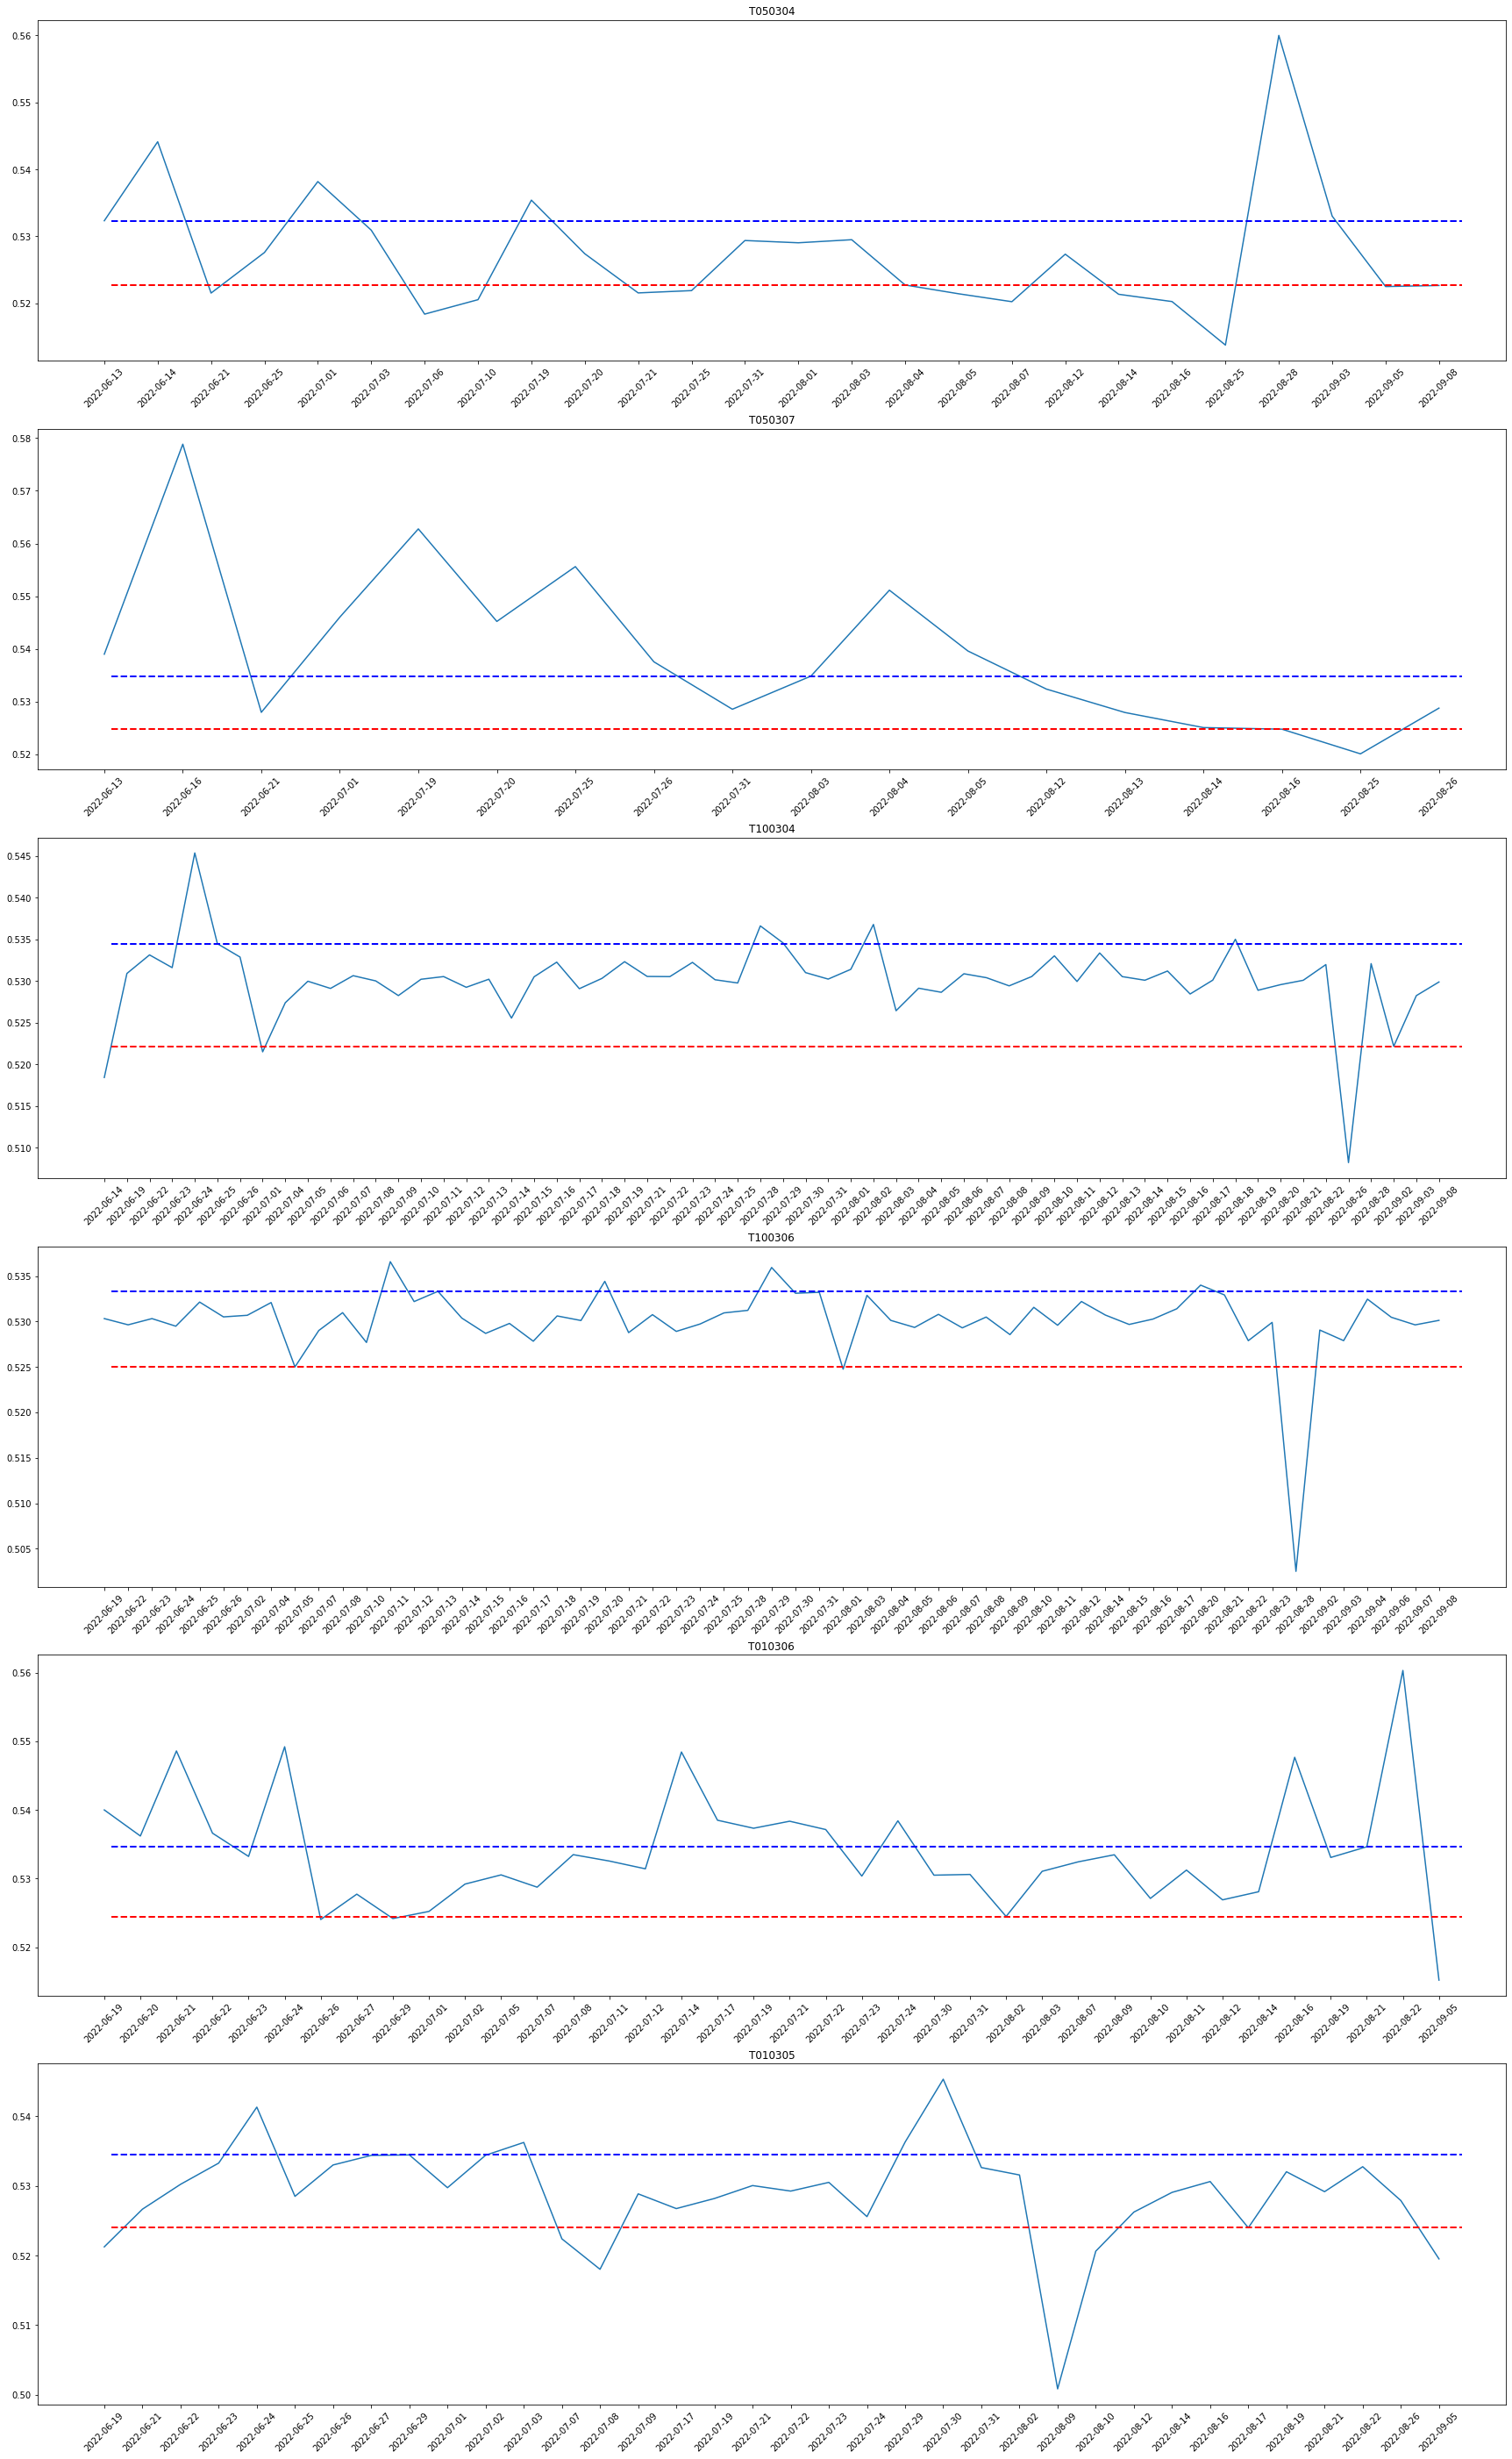

In [ ]:
rcParams['figure.figsize'] = 30, 50
for i, line in enumerate(train_df['LINE'].unique()):
  plt.subplot(len(train_df['LINE'].unique()),1,i+1) #캔버스 이동
  lines_tmp = train_df[train_df['LINE']==line]
  lines_tmp['TIMESTAMP'] = pd.to_datetime(lines_tmp['TIMESTAMP']).dt.strftime('%Y-%m-%d')
  lines_tmp = lines_tmp.groupby('TIMESTAMP').mean()

  plt.plot(lines_tmp.index,lines_tmp['Y_Quality'])
  plt.title(line)
  plt.axhline(lines_tmp[lines_tmp['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
  plt.axhline(lines_tmp[lines_tmp['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

  plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

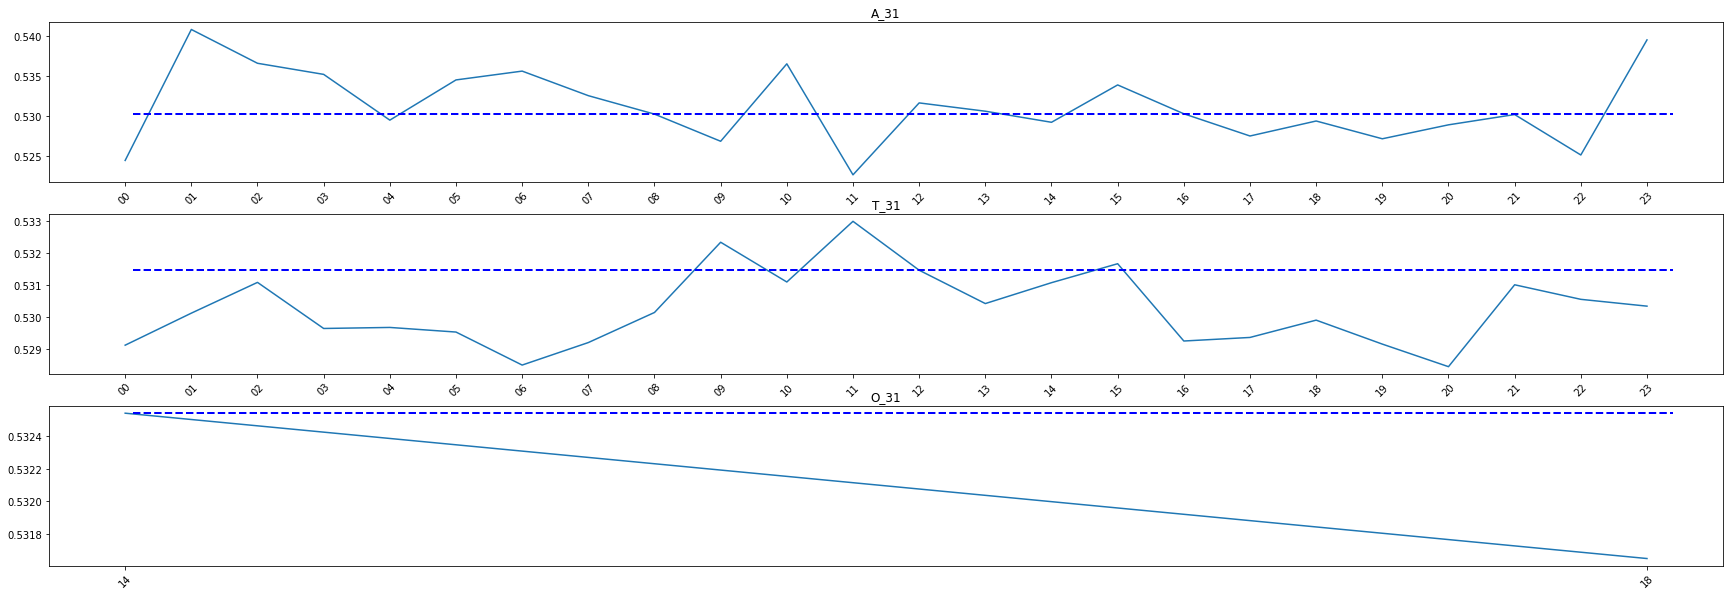

In [ ]:
#빨간색이 안그려지는데 왜지
rcParams['figure.figsize'] = 30, 10
for i, prod in enumerate(train_df['PRODUCT_CODE'].unique()):
  plt.subplot(len(train_df['PRODUCT_CODE'].unique()),1,i+1) #캔버스 이동
  prods_tmp = train_df[train_df['PRODUCT_CODE']==prod]
  prods_tmp['TIMESTAMP'] = pd.to_datetime(prods_tmp['TIMESTAMP']).dt.strftime('%H')
  prods_tmp = prods_tmp.groupby('TIMESTAMP').mean()

  plt.plot(prods_tmp.index,prods_tmp['Y_Quality'])
  plt.title(prod)
  plt.axhline(prods_tmp[prods_tmp['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
  plt.axhline(prods_tmp[prods_tmp['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

  plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

평균을 때리는게 맞는 방법인지는 잘 모르겠음 여기선.
 공정 감가상각 및 기계가 보수 후 점차 갈릴 것이기 때문에,,,,(보수 후 다음 보수까지(LG차원에서 이 보수 주기는 잘 알아서 했겠죠) 일주일 단위로 끊어서 y_quality를 보거나 하여 '보수 주기'를 찾아 해당 주기 내에 test data가 어디 위치하는지를 알려주는 인덱스에 대한 피쳐를 만들어보면 어떨까ㅏㅏㅏㅏㅏ 하는 생각!

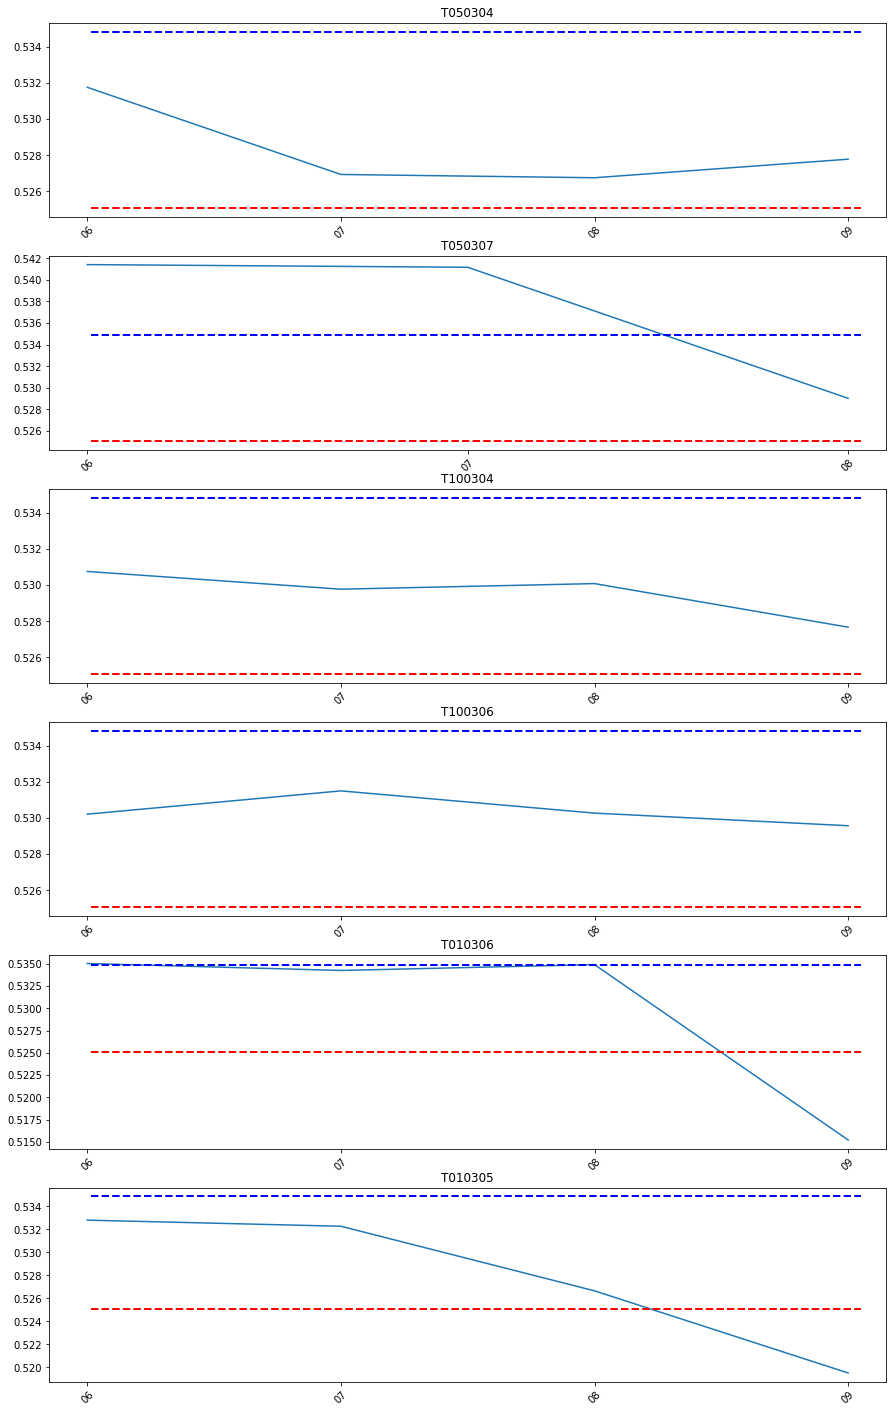

In [ ]:
rcParams['figure.figsize'] = 15,25
for i, line in enumerate(train_df['LINE'].unique()):
  plt.subplot(len(train_df['LINE'].unique()),1,i+1) #캔버스 이동
  lines_tmp = train_df[train_df['LINE']==line]
  lines_tmp['TIMESTAMP'] = pd.to_datetime(lines_tmp['TIMESTAMP']).dt.strftime('%m')
  lines_tmp = lines_tmp.groupby('TIMESTAMP').mean()

  plt.plot(lines_tmp.index,lines_tmp['Y_Quality'])
  plt.title(line)
  plt.axhline(train_df[train_df['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
  plt.axhline(train_df[train_df['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

  plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

In [ ]:
train_df[train_df['PRODUCT_CODE']=='O_31']

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a_class = train_df[train_df['PRODUCT_CODE']=='A_31']
t_class = train_df[train_df['PRODUCT_CODE']=='T_31']
o_class = train_df[train_df['PRODUCT_CODE']=='O_31']

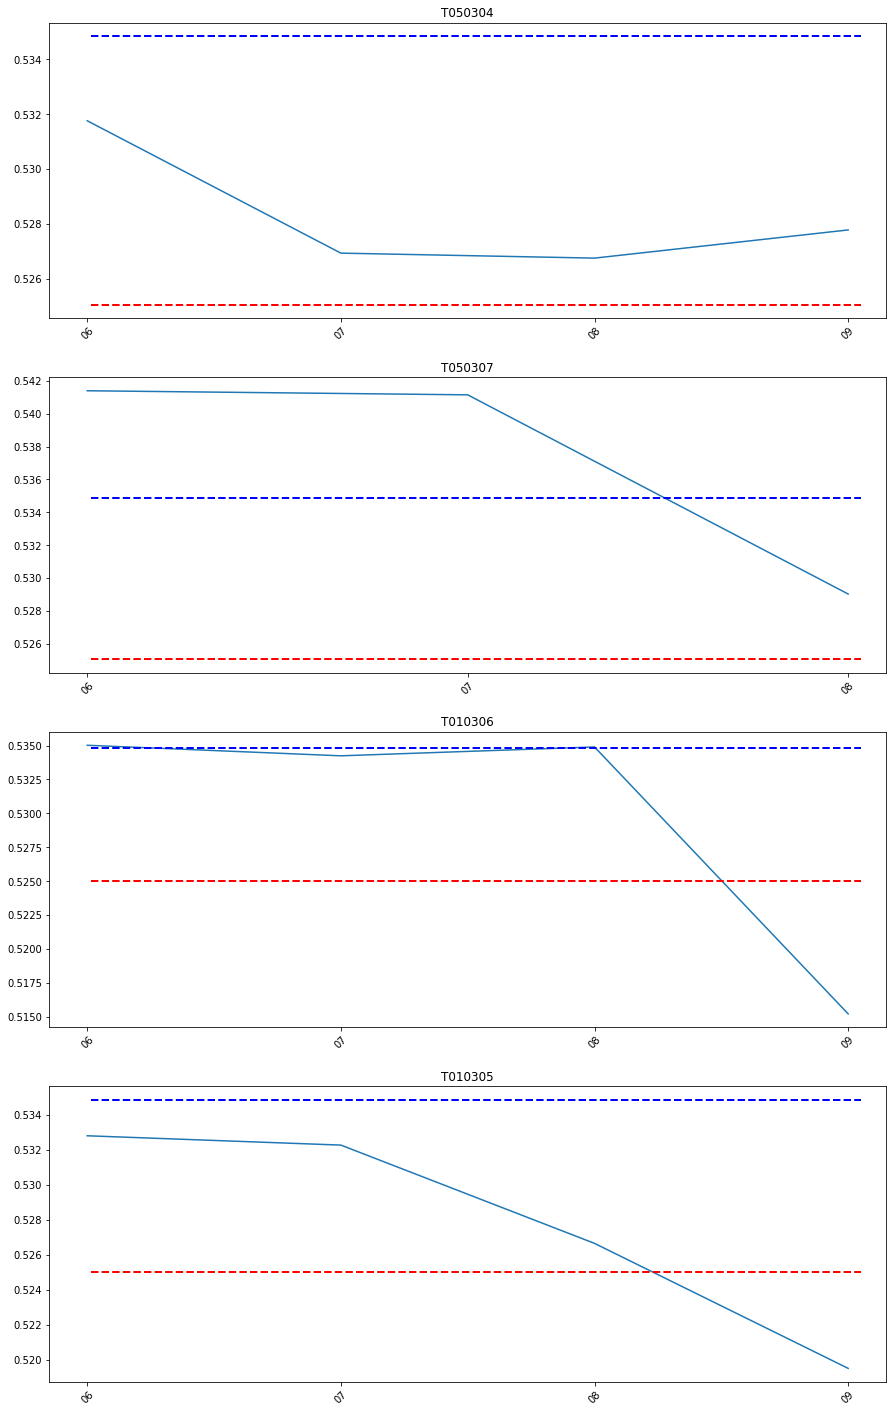

In [ ]:
rcParams['figure.figsize'] = 15,25
for i, line in enumerate(a_class['LINE'].unique()):
  plt.subplot(len(a_class['LINE'].unique()),1,i+1) #캔버스 이동
  lines_tmp = a_class[a_class['LINE']==line]
  lines_tmp['TIMESTAMP'] = pd.to_datetime(lines_tmp['TIMESTAMP']).dt.strftime('%m')
  lines_tmp = lines_tmp.groupby('TIMESTAMP').mean()

  plt.plot(lines_tmp.index,lines_tmp['Y_Quality'])
  plt.title(line)
  plt.axhline(a_class[a_class['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
  plt.axhline(a_class[a_class['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

  plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

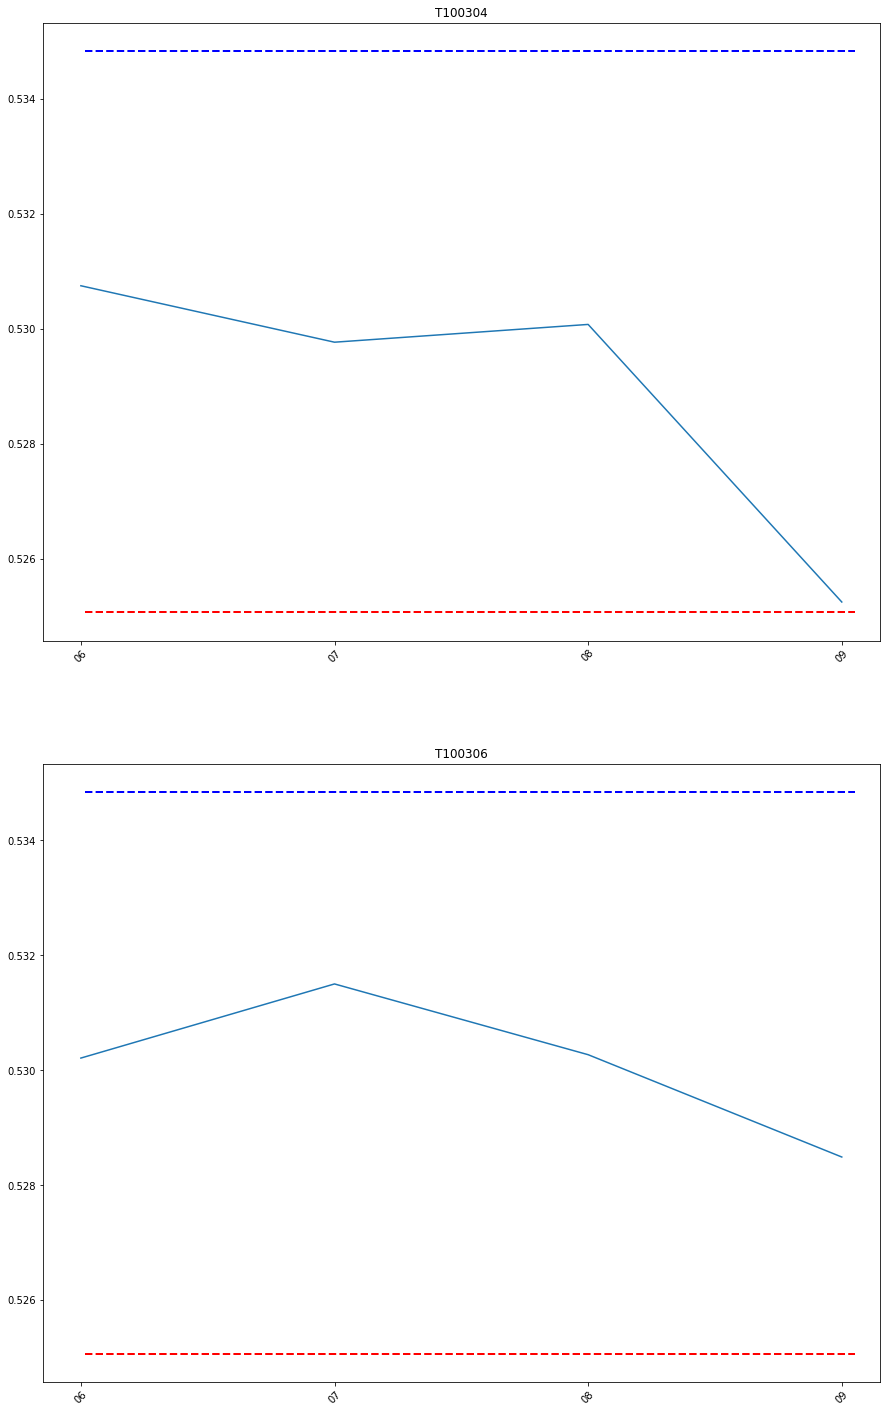

In [ ]:
rcParams['figure.figsize'] = 15,25
for i, line in enumerate(t_class['LINE'].unique()):
  plt.subplot(len(t_class['LINE'].unique()),1,i+1) #캔버스 이동
  lines_tmp = t_class[t_class['LINE']==line]
  lines_tmp['TIMESTAMP'] = pd.to_datetime(lines_tmp['TIMESTAMP']).dt.strftime('%m')
  lines_tmp = lines_tmp.groupby('TIMESTAMP').mean()

  plt.plot(lines_tmp.index,lines_tmp['Y_Quality'])
  plt.title(line)
  plt.axhline(t_class[t_class['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
  plt.axhline(t_class[t_class['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

  plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

In [ ]:
a_class.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            576, 579, 580, 581, 582, 583, 584, 585, 594, 595],
           dtype='int64', length=249)

In [ ]:
a_class = train_df[train_df['PRODUCT_CODE']=='A_31']
a_class

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,NaN,NaN,NaN,NaN,...,51.71,59.64,54.61,57.05,63.18,1.0,NaN,NaN,NaN,NaN
584,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN


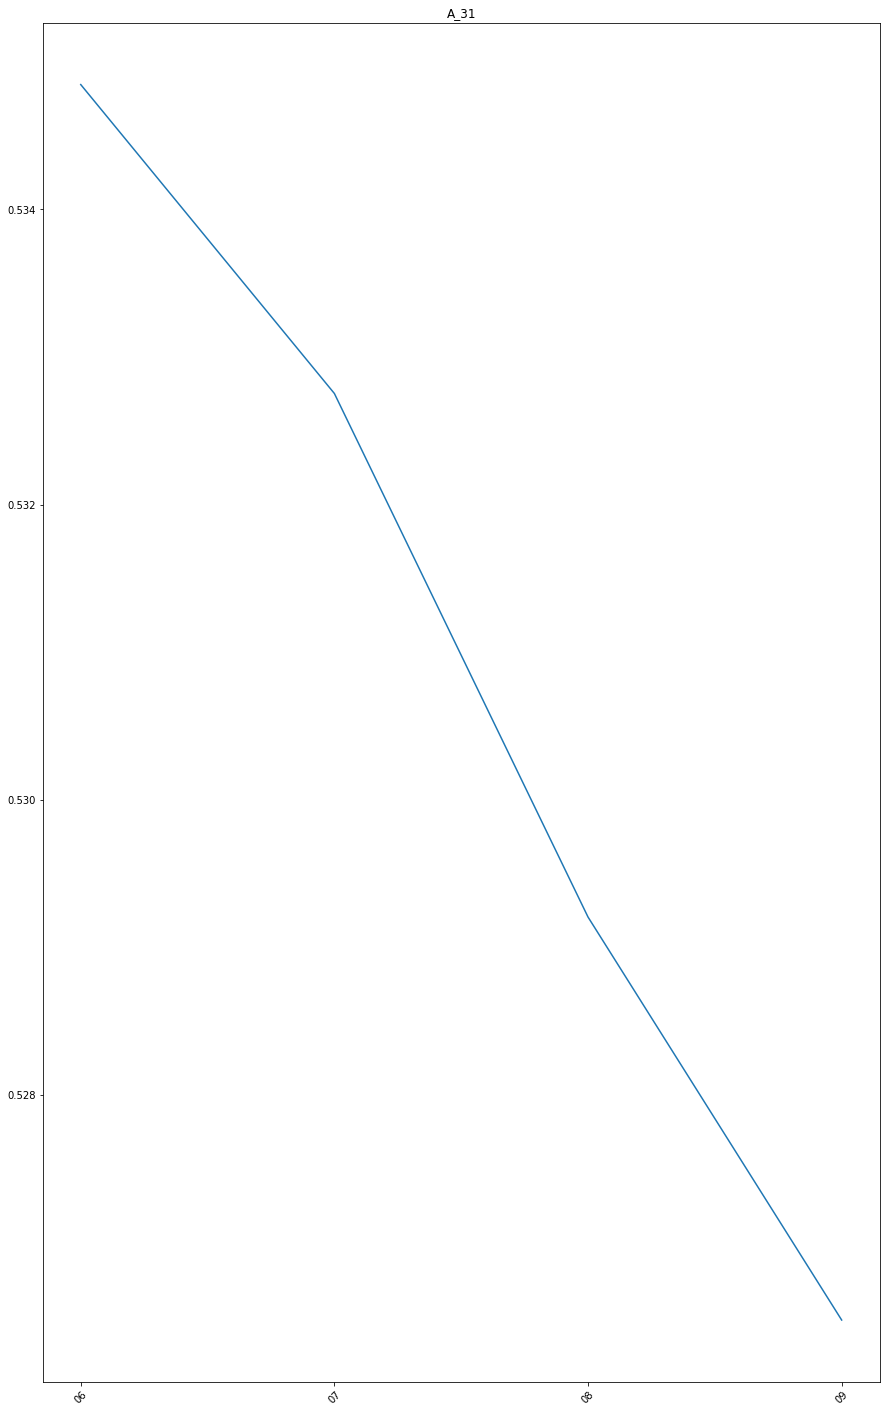

In [ ]:
rcParams['figure.figsize'] = 15,25
a_class['TIMESTAMP'] = pd.to_datetime(a_class['TIMESTAMP']).dt.strftime('%m')
a_class = a_class.groupby('TIMESTAMP').mean()

plt.plot(a_class.index,a_class['Y_Quality'])
#plt.axhline(a_class[a_class['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
#plt.axhline(a_class[a_class['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2

plt.xticks(rotation=45)
plt.title('A_31')

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN,6.0
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN,6.0
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN,6.0
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN,6.0
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN,9.0
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9.0
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [ ]:
train_df[['PRODUCT_CODE','PRODUCT_ID', 'LINE','TIMESTAMP','Y_Class','Y_Quality']].isnull().sum()

PRODUCT_CODE    0
PRODUCT_ID      0
LINE            0
TIMESTAMP       0
Y_Class         0
Y_Quality       0
dtype: int64

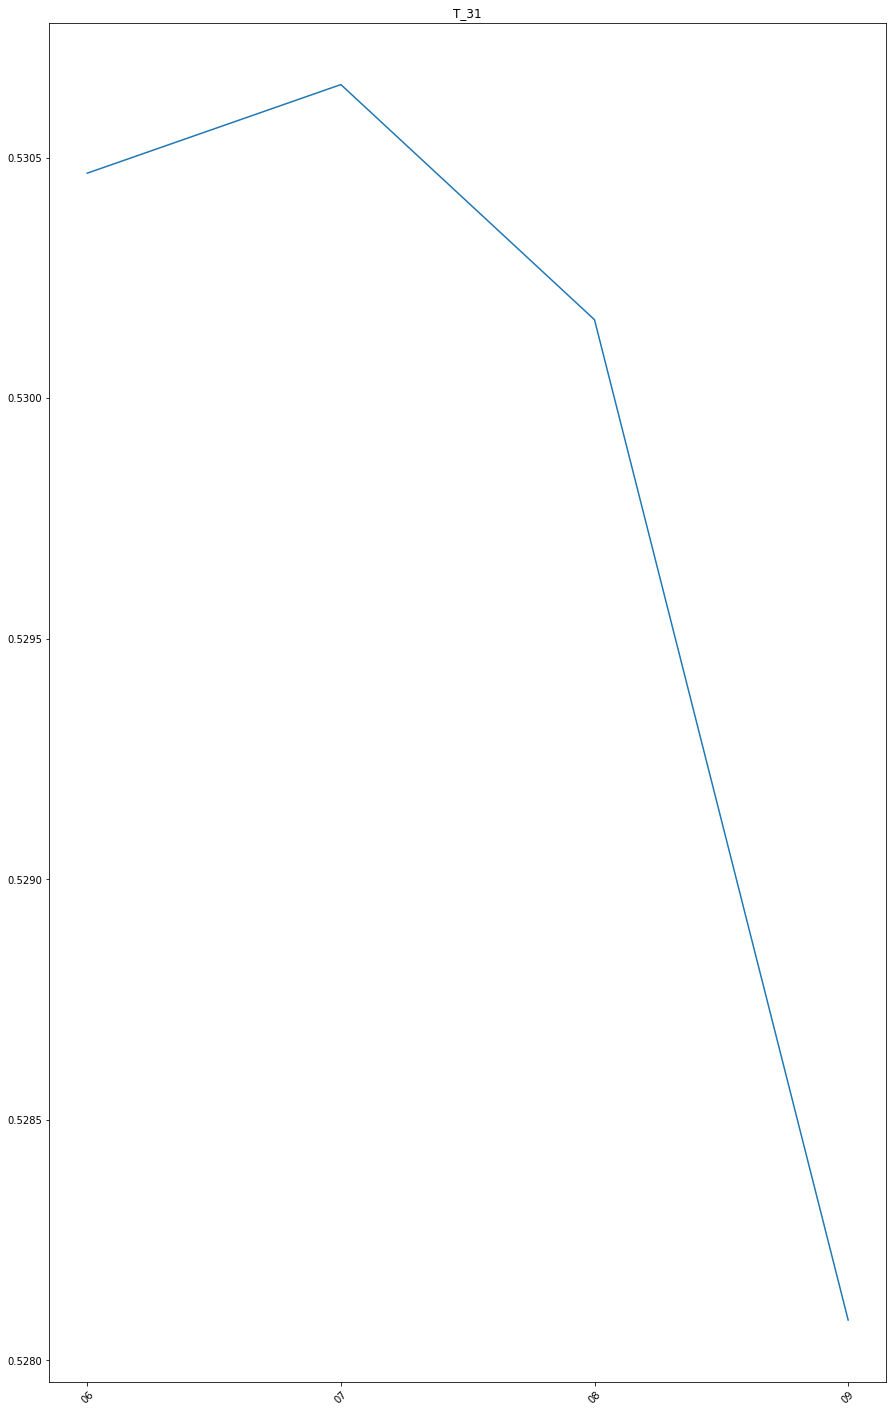

In [ ]:
rcParams['figure.figsize'] = 15,25
t_class['TIMESTAMP'] = pd.to_datetime(t_class['TIMESTAMP']).dt.strftime('%m')
t_class = t_class.groupby('TIMESTAMP').mean()

plt.plot(t_class.index,t_class['Y_Quality'])
plt.title('T_31')

plt.xticks(rotation=45)

plt.show()


In [ ]:
o_class = train_df[train_df['PRODUCT_CODE']=='O_31']
o_class

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


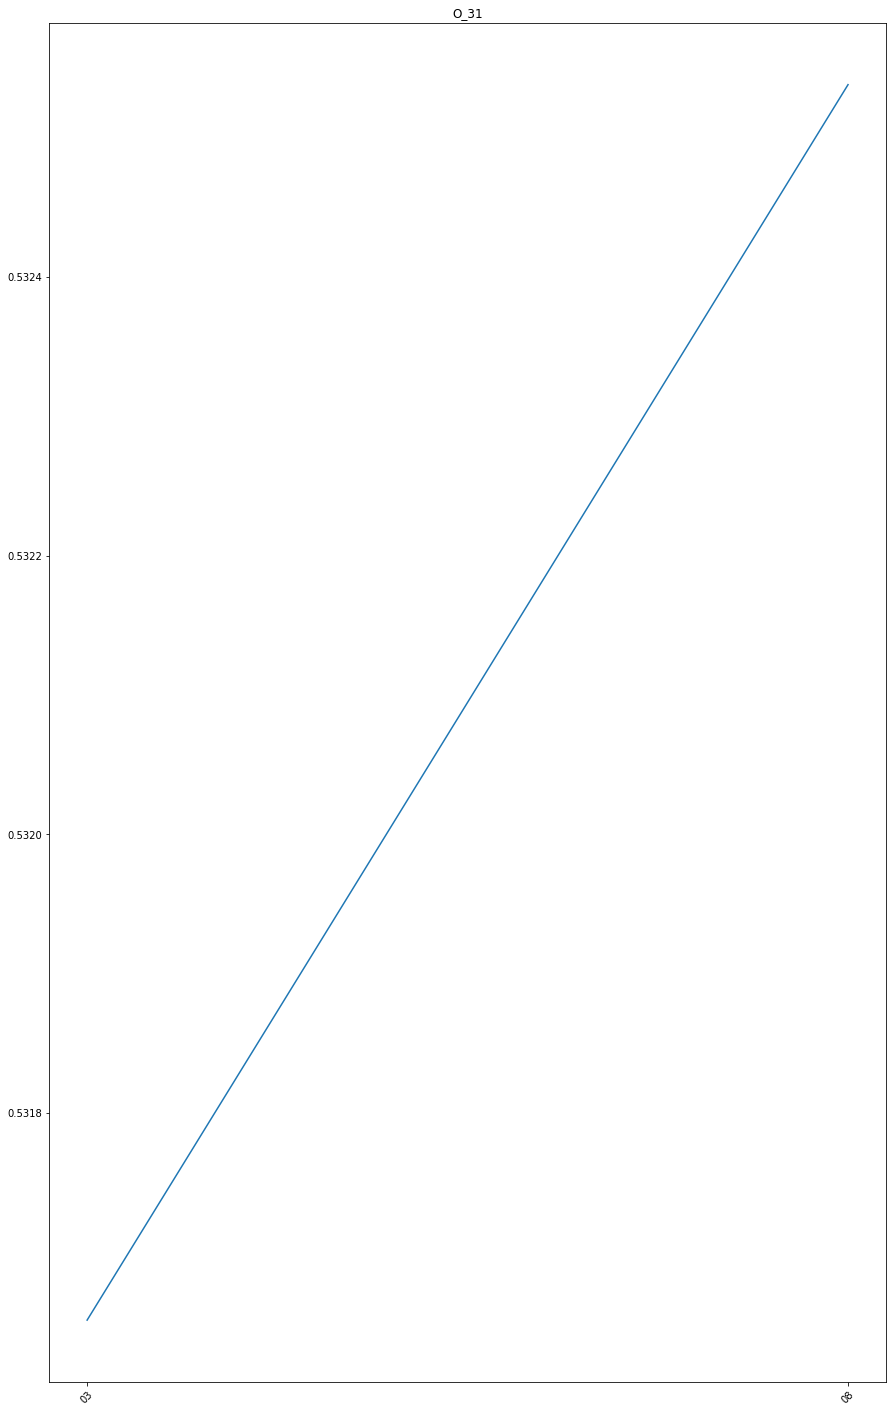

In [ ]:
rcParams['figure.figsize'] = 15,25
o_class['TIMESTAMP'] = pd.to_datetime(o_class['TIMESTAMP']).dt.strftime('%d')
o_class = o_class.groupby('TIMESTAMP').mean()

plt.plot(o_class.index,o_class['Y_Quality'])
#plt.axhline(a_class[a_class['Y_Class']==0]['Y_Quality'].max(), 0.05, 0.97, color='red', linestyle='--', linewidth=2)#0->1
#plt.axhline(a_class[a_class['Y_Class']==1]['Y_Quality'].max(), 0.05, 0.97, color='blue', linestyle='--', linewidth=2)#1->2
plt.title('O_31')
plt.xticks(rotation=45)

plt.show()
#붉은선-> 0과 1 경계
#파란선-> 1과 2 경계
#사실 명확한 경계라고 하기엔 어렵고, y_quality 기준 0의 max값과 1의 max값을 차용

In [ ]:
#month에서 경향성 check. 보인다

In [ ]:
a_class = train_df[train_df['PRODUCT_CODE']=='A_31']
t_class = train_df[train_df['PRODUCT_CODE']=='T_31']
o_class = train_df[train_df['PRODUCT_CODE']=='O_31']

In [ ]:
from collections import Counter

non_null_df = a_class.notnull()

# Find the common non-null columns for all rows
common_non_null_columns = non_null_df.columns[(non_null_df.sum(axis=0) == len(non_null_df)) & (non_null_df.sum(axis=0) != 0)].tolist()

print(common_non_null_columns)



['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE', 'PRODUCT_CODE', 'X_284', 'X_955', 'X_956', 'X_1002', 'X_1003', 'X_1004', 'X_1005', 'X_1077', 'X_1078', 'X_1079', 'X_1080', 'X_1081', 'X_1082', 'X_1083', 'X_1084', 'X_1085', 'X_1086', 'X_1087', 'X_1088', 'X_1089', 'X_1090', 'X_1091', 'X_1092', 'X_1093', 'X_1094', 'X_1095', 'X_1096', 'X_1097', 'X_1098', 'X_1099', 'X_1100', 'X_1101', 'X_1102', 'X_1103', 'X_1104', 'X_1105', 'X_1106', 'X_1107', 'X_1108', 'X_1109', 'X_1110', 'X_1111', 'X_1112', 'X_1113', 'X_1114', 'X_1115', 'X_1116', 'X_1117', 'X_1118', 'X_1119', 'X_1120', 'X_1121', 'X_1122', 'X_1123', 'X_1124', 'X_1125', 'X_1126', 'X_1127', 'X_1128', 'X_1129', 'X_1130', 'X_1131', 'X_1132', 'X_1133', 'X_1134', 'X_1135', 'X_1136', 'X_1137', 'X_1138', 'X_1139', 'X_1140', 'X_1141', 'X_1142', 'X_1143', 'X_1144', 'X_1145', 'X_1146', 'X_1147', 'X_1148', 'X_1149', 'X_1150', 'X_1151', 'X_1152', 'X_1153', 'X_1154', 'X_1155', 'X_1156', 'X_1157', 'X_1193', 'X_1194', 'X_1195', 'X_1196', 'X_1197

조금씩 사용되는 row들이 다른 것 같음.

In [ ]:
non_null_columns = {index: len(a_class.head(10).columns[row.notnull()].tolist())
                    for index, row in a_class.head(10).iterrows()}

print(non_null_columns)

{0: 1972, 1: 1980, 2: 1968, 3: 1980, 4: 1968, 5: 1980, 6: 1968, 7: 1980, 8: 1968, 9: 1980}


In [ ]:
non_null_column_count = a_class.notnull().sum(axis=1)
non_null_column_count.value_counts()

877     72
887     55
1478    17
1968    14
1980    11
1488     7
1898     7
1479     5
1489     5
1477     5
1911     4
1475     3
1871     3
1908     3
1462     2
1486     2
1954     2
1897     2
1910     2
1461     1
882      1
1483     1
1107     1
1451     1
1083     1
1434     1
1487     1
1329     1
1470     1
1452     1
1972     1
1896     1
1459     1
1899     1
1885     1
1895     1
1909     1
1884     1
1882     1
1883     1
1955     1
1965     1
1967     1
892      1
1948     1
1942     1
1456     1
dtype: int64

In [ ]:
majority_non_null_columns = a_class.columns[(a_class.notnull().sum() / len(a_class)) >= 0.5]
len(majority_non_null_columns)

869

In [ ]:
len(common_non_null_columns)

248

In [ ]:
a_class.iloc[:,200:300]

,X_195,X_196,X_197,X_198,X_199,X_200,X_201,X_202,X_203,X_204,...,X_285,X_286,X_287,X_288,X_289,X_290,X_291,X_292,X_293,X_294
0,0.0,51.4,51.4,51.1,48.9,55.5,55.5,52.5,47.3,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,53.8,53.8,54.0,59.4,60.7,60.7,60.4,57.4,59.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,51.4,51.4,51.1,48.9,55.5,55.5,52.5,47.3,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,53.8,53.8,54.0,59.4,60.7,60.7,60.4,57.4,59.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,51.4,51.4,51.1,48.9,55.5,55.5,52.5,47.3,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.0,51.4,51.4,51.1,48.9,55.5,55.5,52.5,47.3,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.9,68.4,66.9,79.4,71.3,82.1,69.4,67.2,73.0,74.6
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.3,67.3,66.0,81.0,72.2,81.2,75.0,68.3,79.9,79.0
594,0.0,51.4,51.4,51.1,48.9,55.5,55.5,52.5,47.3,55.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouped = a_class.groupby(a_class.isnull().apply(tuple, axis=1))
group_dfs = []

for name, group in grouped:
    group_df = grouped.get_group(name)
    group_dfs.append(group_df)

In [ ]:
group_dfs

[   PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
 21  TRAIN_021        2   0.544129  2022-06-14 5:58  T050304         A_31  NaN   
 
     X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  \
 21  NaN  NaN  NaN  ...     NaN     NaN     NaN     NaN     NaN     1.0   
 
     X_2872  X_2873  X_2874  X_2875  
 21     NaN     NaN     NaN     NaN  
 
 [1 rows x 2881 columns],
   PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
 0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31  NaN   
 
    X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
 0  NaN  NaN  NaN  ...   39.34   40.89   32.56   34.09   77.77     NaN     NaN   
 
    X_2873  X_2874  X_2875  
 0     NaN     NaN     NaN  
 
 [1 rows x 2881 columns],
    PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
 2   TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31  NaN  

In [ ]:
#결측열 같은지 여부 체크
for i in [32,38,47,51,53,54,67,68,70,72,76,78,83,91,101,102,115,117,124,139,140,145,146,147,148,159,160,178]:
  if (train_df.iloc[27].notnull() == train_df.iloc[i].notnull()).all():
      print("The non-null columns of the two rows are the same.")
  else:
      print("The non-null columns of the two rows are not the same.")

The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two rows are the same.
The non-null columns of the two

In [ ]:
grouped = a_class.groupby(a_class.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped:
    cnt+=1
    globals()['group{}_df'.format(cnt)] = grouped.get_group(name)



In [ ]:
cnt#55개의 그룹 존재.

55

In [ ]:
groups_size=[]
for i in range(1,56):
  groups_size.append(len(globals()['group{}_df'.format(i)]))
groups_size
#예외적인 상황을 가지는 친구들이 좀 많다. 그룹을 나눈 기준은, 결국 같은 변수를 공유하느냐이다.(한개도 빠짐없이!)
#이 경우에는 유일한 x 변수 조합을 non null 조합으로 가지는 경우가 많다
#그룹별로 클래스가 좀 묶일줄 알았는데 그것도 아니었다.
#라인은 항상 동일하다. 그니까, 지금은 조금이라도 다르면 다른 분류로 엮었는데
#라인별로 그루핑을 시켜보자
#그러면 라인별로, train을 시킨다음에 feature importance를 보자. Tree 계열 xgboost를 써서 만약에 동일 라인인ㄷ

[1,
 1,
 9,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 1,
 5,
 2,
 17,
 1,
 5,
 2,
 1,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 1,
 7,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 26,
 1,
 32,
 1,
 29,
 40]

In [ ]:
groups_lines=[]
for i in range(1,56):
  groups_lines.append(len(globals()['group{}_df'.format(i)]['LINE'].value_counts())) #결과는 모두 1
groups_lines#그룹을 나눈 것은, 사용된 변수가 같은 그룹을 의미하는 것이다. 이 때 그룹들은 하나의 line만을 지나간다.


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
groups_lines=a_class.groupby('LINE')
line=0
for name, group in groups_lines:
    line+=1
    globals()['group_line{}_df'.format(line)] = groups_lines.get_group(name)

In [ ]:
group_line1_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
28,TRAIN_028,0,0.521249,2022-06-19 20:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,TRAIN_033,1,0.526656,2022-06-21 7:14,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,TRAIN_039,1,0.531583,2022-06-22 4:45,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,TRAIN_040,1,0.530829,2022-06-22 12:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,TRAIN_041,1,0.528270,2022-06-22 12:34,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,TRAIN_048,1,0.533273,2022-06-23 15:50,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,TRAIN_052,2,0.555514,2022-06-24 4:13,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,TRAIN_057,2,0.535741,2022-06-24 21:38,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,TRAIN_058,2,0.537122,2022-06-24 21:46,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,TRAIN_059,2,0.536859,2022-06-24 22:39,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Submission_code

In [ ]:
import pandas as pd
import random
import os
import numpy as np
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
test_df = pd.read_csv('./drive/MyDrive/open/test.csv')
train_df['month'] = pd.to_datetime(train_df['TIMESTAMP']).dt.strftime('%m')
test_df['month'] = pd.to_datetime(test_df['TIMESTAMP']).dt.strftime('%m')

train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    for label in np.unique(test_x[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i])
print('Done.')

Done.


In [ ]:
train_df['month']=train_df['month'].astype('float')
train_df['month'].dtypes

dtype('float64')

In [ ]:
RF = RandomForestClassifier(random_state=37).fit(train_x, train_y)
print('Done.')

Done.


In [ ]:
preds = RF.predict(test_x)
print('Done.')

Done.


In [ ]:
submit = pd.read_csv('./drive/MyDrive/open/sample_submission.csv')
submit['Y_Class'] = preds
submit.to_csv('./drive/MyDrive/open/sample_submission2.csv', index=False)